# Clustering Techniques: D212
## By Natalie Toler

### Table of Contents
#### Part 1: Research Question
#### Part 2: Technique Justification
#### Part 3: Data Preparation
#### Part 4: Analysis
#### Part 5: Data Summary and Implications
#### Part 6: Demonstration

#### Sources

## Part 1: Research Question

1. Research Question

   In order to better serve the patient population, hospital systems need to identify distinct groups of patients based on their age and the total cost of hospitalization. Using k-means clustering, can we identify distinct clusters of patients, and what are the characteristics of these clusters in terms of age and hospitalization cost?  
&nbsp;


2. One goal of the analysis

   The goal of this data analysis is to identify distinct clusters of patients based on their age and the total cost of hospitalization using k-means clustering. By understanding the characteristics of these clusters, the hospital system can gain insights into the varying needs and resource utilization of different patient groups, which can inform targeted strategies for improving patient care and optimizing hospital resources.

## Part 2: Technique Justification

1. Expected Outcomes of chosen Clustering Technique

    Because I am using two continuous variables I will be using K-means as my clustering technique. The K-means technique works by randomly selecting central points (centroids) in a space based on the age and total cost variables. Then each patient in the dataset will be assigned to the nearest centroid. The clusters are refined by taking the average of the variables in each cluster and reassigning the centroid until there is no significant change in the centroids. This creates clusters of patients with similar age and total costs. Identifing the commonalities of patients in the clusters can help to uncover patterns and trends within the data. 
&nbsp;

    
2. Assumption of clustering Technique

    One assumption of the K-means method which effects this project is feature independence. This assumes that the variables, in my case age and total cost, are independent and equally important. When variables have different scales the K-means method can be biased towards the variable with a larger scale and therefore the data needs to be normalized.
&nbsp;

3. Packages and Libraries being used

    The following packages are being used:

In [1]:
# The Packages and Libraries I will use for the project

import pandas as pd # Handles the dataset
import numpy as np # Performs certain maths operations
import matplotlib.pyplot as plt # provides visualizations
%matplotlib inline
import seaborn as sns # Provides more visualizations
from sklearn.preprocessing import StandardScaler # Normalizes the data
from sklearn.cluster import KMeans # Provides the K-Means technique
from sklearn.metrics import silhouette_score # Is used to evaluate the K-Means model
from IPython.display import display, HTML # Makes certain analysis outputs easier to read

## Part 3: Data Preparation

1. Data preprocessing goal for clustering technique

    As stated in the assumption of feature independence one of the most important preprocessing to be done is to normalize the two variables I will be using. Using the standard scaler the age and total cost will be scaled using the z-score which makes the means 0 and standard deviation 1. This method puts the variables at the same scale.
&nbsp;

2. initial dataset variables used for clustering, label as continuous or categorical

    The two variables that I will be using for the clustering technique are Age and Total Cost. Both of these variables are continuous variables. Later in my analysis I will also be using the categorical variables of readmission, initial admission, and gender.
&nbsp;

3. Explain each step of data preparation

    The process of data preparation is explained throughout my code. Importantly much of the beginning steps of my cleaning process are taken from my previous projects using the same data.

In [2]:
#Import the dataset and make sure the bonus column is not created.
df = pd.read_csv('medical_clean.csv', index_col=0)
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [3]:
#Adjusting the Zipcode column because zipcodes with a leading 0 have had that 0 deleted
# Convert the Zip column to a string and then pad any values with 4 numbers with a leading 0
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

# Check that all values are 5 long
all_have_five_values = all(len(str(value)) == 5 for value in df['Zip'])
print(all_have_five_values)

True


In [4]:
#Simplifying the Timezone categories
df.TimeZone.replace({
    # Puerto Rica has it's own time zone
    'America/Puerto_Rico' : "US - Puerto Rico",
    # All the cities in the US Eastern zone
    'America/New_York' : 'US - Eastern',
    'America/Detroit' : 'US - Eastern',
    'America/Indiana/Indianapolis' : 'US - Eastern',
    'America/Indiana/Vevay' : 'US - Eastern',
    'America/Indiana/Vincennes' : 'US - Eastern',
    'America/Kentucky/Louisville' : 'US - Eastern',
    'America/Toronto' : 'US - Eastern',
    'America/Indiana/Marengo' : 'US - Eastern',
    'America/Indiana/Winamac' : 'US - Eastern',
    # All the cities in US Central zone
    'America/Chicago' : 'US - Central',
    'America/Menominee' : 'US - Central',
    'America/Indiana/Knox' : 'US - Central',
    'America/Indiana/Tell_City' : 'US - Central',
    'America/North_Dakota/Beulah' : 'US - Central',
    'America/North_Dakota/New_Salem' : 'US - Central',
    # All the Cities in US Mountain zone
    'America/Denver' : 'US - Mountain',
    'America/Boise' : 'US - Mountain',
    # Arizona which is Mountain but doesn't observe day light savings
    'America/Phoenix' : 'US - Arizona',
    # The city in Pacific time
    'America/Los_Angeles' : 'US - Pacific',
    # Alaskan Time zone
    'America/Nome' : 'US - Alaskan',
    'America/Anchorage' : 'US - Alaskan',
    'America/Sitka' : 'US - Alaskan',
    'America/Yakutat' : 'US - Alaskan',
    # Hawaiian Time Zone that doesn't observe day light savings
    'Pacific/Honolulu' : 'US - Hawaiian',
    # Aleutian time zone that observes day light savings and otherwise would be with Hawaiian
    'America/Adak' : 'US - Aleutian'
    }, inplace = True)

df['TimeZone'].value_counts()

US - Eastern        4326
US - Central        3792
US - Pacific         937
US - Mountain        698
US - Arizona         100
US - Alaskan          69
US - Puerto Rico      43
US - Hawaiian         34
US - Aleutian          1
Name: TimeZone, dtype: int64

In [5]:
#Changing Datatypes
#Convert area to category from string
df["Area"] = df["Area"].astype("category")
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to category from string
df["Services"] = df["Services"].astype("category")

In [6]:
#Boolean columns remapped to 1/0 binary
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)

In [7]:
# Convert Complication risk to 1, 2, 3 for low, medium, high
risk_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
# Map the values in the "complication_risk" column using the defined mapping
df['Complication_risk'] = df['Complication_risk'].map(risk_mapping)
# Convert to int type
df['Complication_risk'] = df['Complication_risk'].astype(int)

In [8]:
# Define the ordered categorical datatype structure
survey_response = pd.CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Apply the ordered categorical datatype to the columns
columns_to_encode = ["Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]
for column in columns_to_encode:
    df[column] = df[column].astype(str)
    df[column] = df[column].astype(survey_response)

In [9]:
#Column renaming
# Generate and apply Pythonic names
pythonic_columns = ['customer_id', 'interactions', 'uid', 'city', 'state', 'county', 'zip', 'lat', 'lng', 'population',
                    'area', 'timezone', 'job', 'children', 'age', 'income', 'marital', 'gender','readmission', 'vit_d',
                    'doc_visits', 'full_meals', 'vit_d_supplement', 'soft_drink', 'initial_admin', 'high_blood',
                    'stroke', 'complication_risk', 'overweight', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain',
                    'anxiety', 'allergic_rhinitis','reflux_esophagitis', 'asthma', 'services', 'initial_days',
                    'total_charge', 'additional_charges', 'survey_timely_admission', 'survey_timely_treatment',
                    'survey_timely_visits', 'survey_reliability', 'survey_options', 'survey_hours_treatment',
                    'survey_courteous_staff', 'survey_active_listening']
df.set_axis(pythonic_columns, axis=1, inplace=True)

/var/folders/vk/xjtd_82n6p19qm_b7nz56_cw0000gn/T/ipykernel_4645/2711196450.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(pythonic_columns, axis=1, inplace=True)


In [10]:
# Check the data now that the cleaning is done
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customer_id              10000 non-null  object  
 1   interactions             10000 non-null  object  
 2   uid                      10000 non-null  object  
 3   city                     10000 non-null  object  
 4   state                    10000 non-null  object  
 5   county                   10000 non-null  object  
 6   zip                      10000 non-null  object  
 7   lat                      10000 non-null  float64 
 8   lng                      10000 non-null  float64 
 9   population               10000 non-null  int64   
 10  area                     10000 non-null  category
 11  timezone                 10000 non-null  category
 12  job                      10000 non-null  object  
 13  children                 10000 non-null  int64   
 14  age   

<Axes: xlabel='age', ylabel='total_charge'>

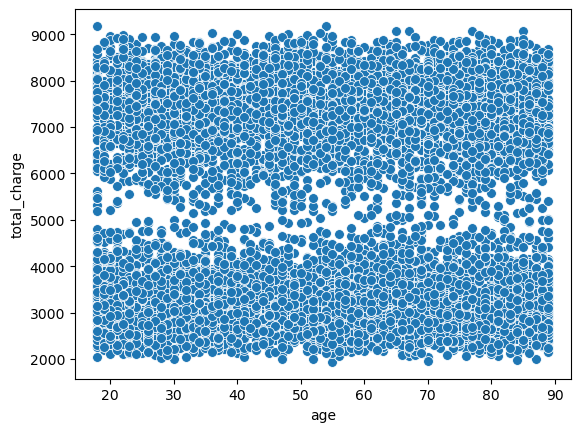

In [11]:
# Create an initial scatterplot of the variables of interest before normalization
sns.scatterplot(data=df, x='age', y='total_charge', s=50)

In [12]:
# Create the Scaler object
scaler = StandardScaler()

In [13]:
# Scale the variables
scaled_df = scaler.fit_transform(df[['age', 'total_charge']])

In [14]:
# Save the Scaled variables in their own DataFrame to maintain data integrity
scaled_df = pd.DataFrame(scaled_df, columns = ['age', 'total_charge'])
scaled_df

,age,total_charge
0,-0.024795,-0.727185
1,-0.121706,-0.513228
2,-0.024795,-1.319983
3,1.186592,-1.460517
4,-1.526914,-1.467285
...,...,...
9995,-1.381548,0.705765
9996,1.622691,1.114312
9997,-0.412438,1.359597
9998,-0.509349,1.069727


4. Copy of Cleaned dataset

In [15]:
# Save Preprocessed Dataframe into a csv
df.to_csv('d212_task_1.csv', index=False)

# Save Scaled Variable data into a csv
scaled_df.to_csv('scaled_data.csv', index=False)

## Part 4: Analysis

1. Optimal number of clusters

    The optimal number of clusters is 4. I was able to determine this by using the elbow method and within cluster sum of square. In the sum of squares 4 clusters is where the centroids stop having wide variability. This is illustrated below in the code. 
&nbsp;

2. Code used to perform analysis

In [16]:
# Create an initial model with 2 clusters, visually how many appear in the test scatterplot above
k_model = KMeans(n_clusters = 2, n_init=25, random_state = 300)
k_model.fit(scaled_df)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [17]:
# Create new dataframe to count the number of patients in each cluster to evaluate further
evaluate = pd.Series(k_model.labels_).value_counts()
evaluate

0    5023
1    4977
dtype: int64

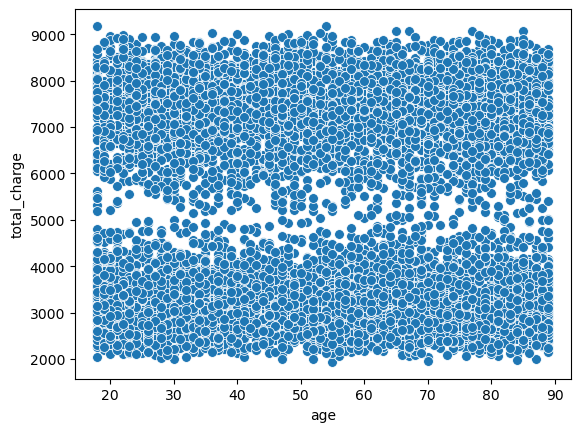

In [18]:
# Create the scatterplot again to visualize the evaluation
ax = sns.scatterplot(data = df, x='age', y='total_charge', s=50)

In [19]:
# Find the centroids of the clusters
centroid = pd.DataFrame(k_model.cluster_centers_, columns=['age', 'total_charge'])
centroid

,age,total_charge
0,-0.015526,-0.942836
1,0.015676,0.951931


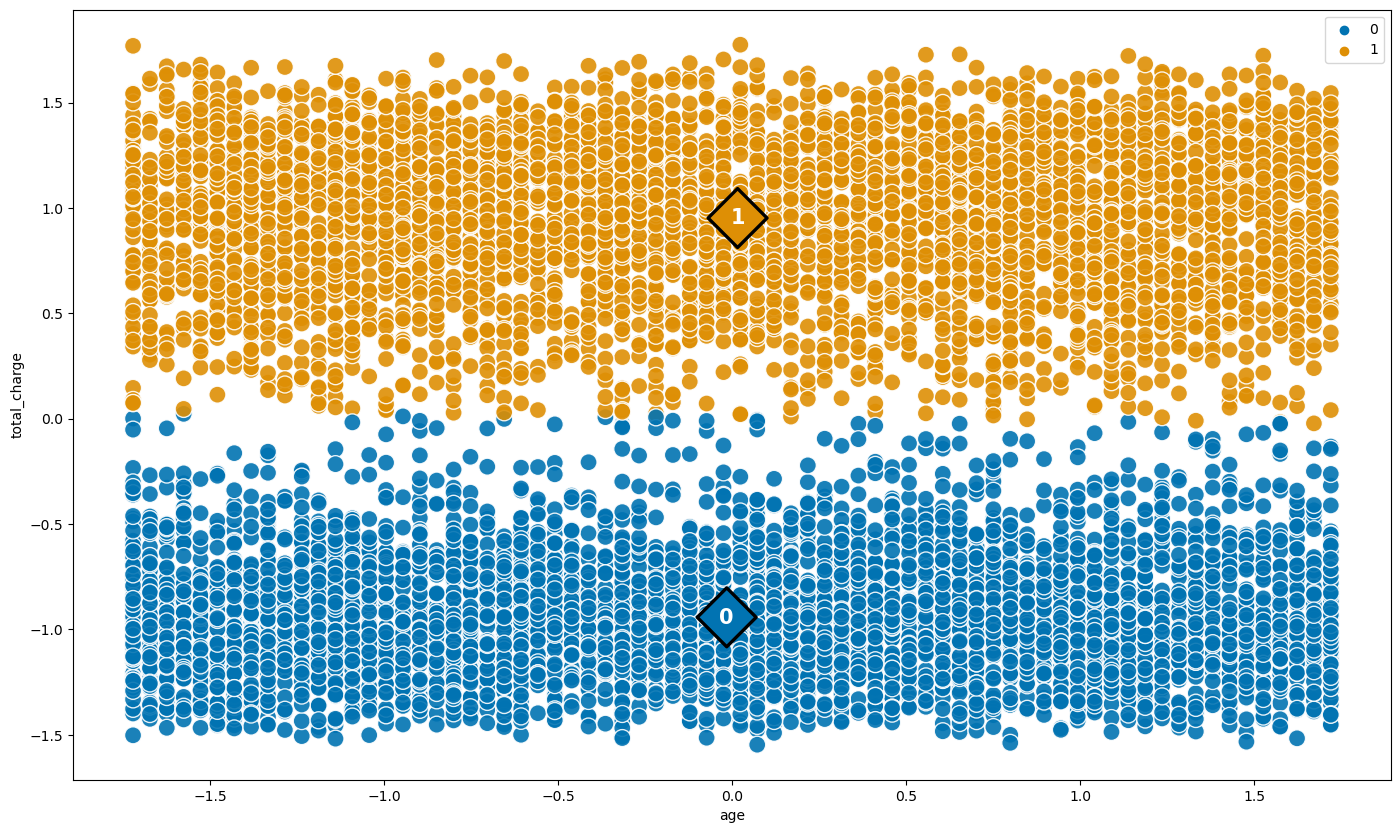

In [20]:
# Plot the data along with the centroids
plt.figure(figsize=(17, 10))

ax = sns.scatterplot(data=scaled_df,
                    x='age',
                    y='total_charge', 
                    hue=k_model.labels_,
                    palette = 'colorblind',
                    alpha=0.9,
                    s=150,
                    legend=True)

ax = sns.scatterplot(data=centroid,
                    x='age',
                    y='total_charge',
                    hue=centroid.index,
                    palette='colorblind',
                    s=900,
                    marker='D',
                    ec='black',
                    legend=False)

for i in range(len(centroid)):
    plt.text(x=centroid.age[i],
            y=centroid.total_charge[i],
            s=i,
            horizontalalignment='center',
            verticalalignment='center',
            size=15,
            weight='bold',
            color='white')

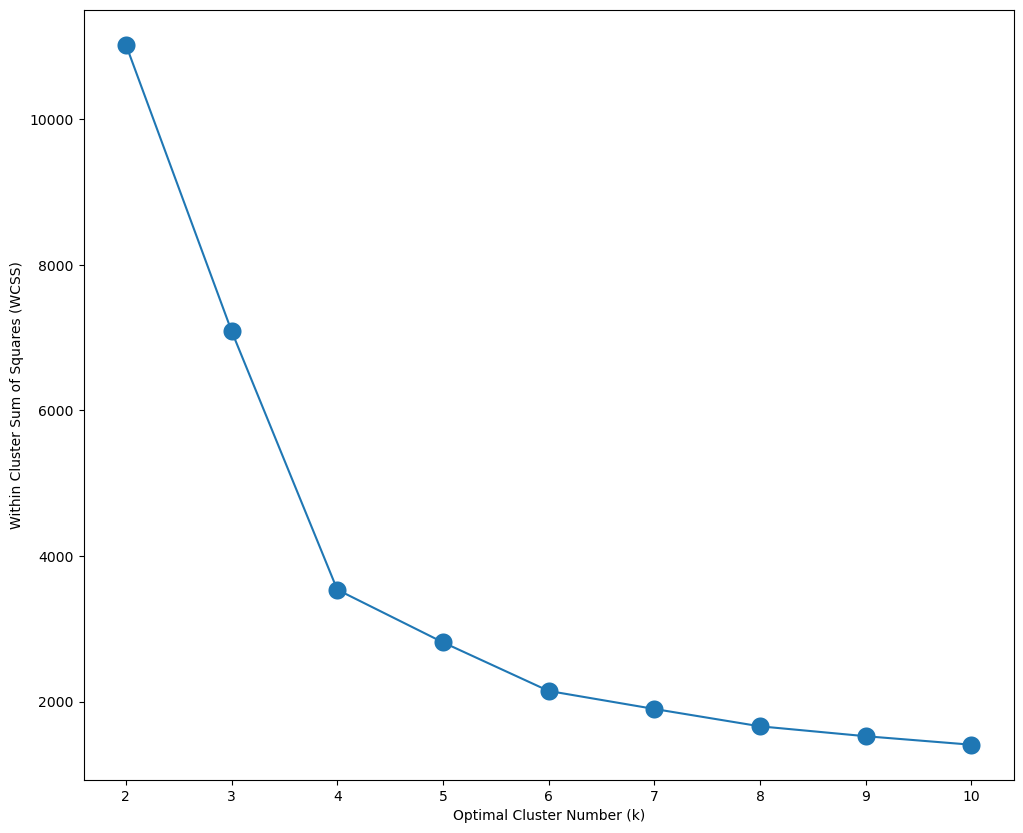

In [21]:
# Use the within cluster sum of squares method to test how many clusters are in the data
wcss = []
for k in range (2, 11):
    model=KMeans(n_clusters=k, n_init=5, random_state=300)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index=range(2,11))

plt.figure(figsize=(12,10))
ax=sns.lineplot(y=wcss_s, x=wcss_s.index)
ax=sns.scatterplot(y=wcss_s, x=wcss_s.index, s=200)
ax=ax.set(xlabel='Optimal Cluster Number (k)',
         ylabel='Within Cluster Sum of Squares (WCSS)')

In [22]:
# Find the silhouette Score to evaluate the quality of the clusters
# -1 means the data points are not similar, 0 is neutral, 1 is very similar
silhouette_score = silhouette_score(scaled_df, k_model.labels_)
silhouette_score

0.4498105432144045

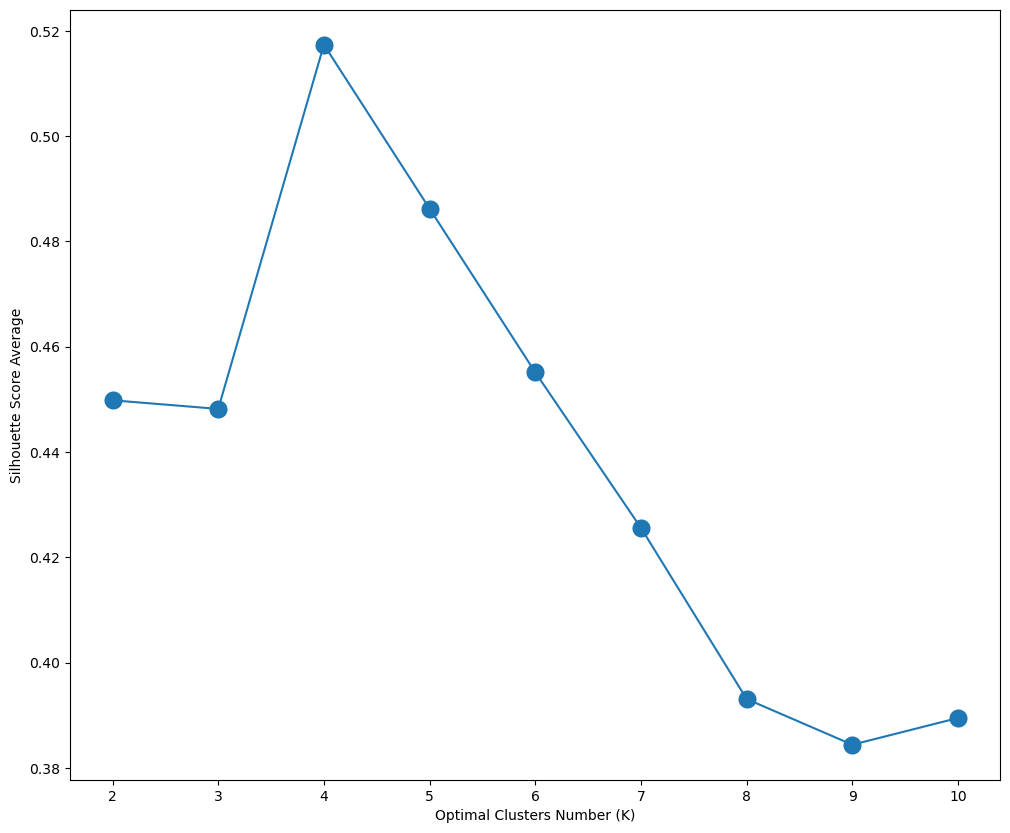

In [23]:
from sklearn.metrics import silhouette_score

# Create a visualization of silhouette scores for several cluster amounts
silhouette = []

for k in range(2, 11):
    model = KMeans(n_clusters = k, n_init = 25, random_state = 300)
    model.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, model.labels_))
    
silhouette_s = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(12,10))
ax = sns.lineplot(y=silhouette_s, x=silhouette_s.index)
ax = sns.scatterplot(y=silhouette_s, x=silhouette_s.index, s=200)
ax = ax.set(xlabel='Optimal Clusters Number (K)',
           ylabel='Silhouette Score Average')

In [24]:
# Create the final model with 4 clusters
fin_model = KMeans(n_clusters = 4, n_init = 25, random_state = 300)
fin_model.fit(scaled_df)

KMeans(n_clusters=4, n_init=25, random_state=300)

In [25]:
# Find the centroids of the clusters
centroid = pd.DataFrame(fin_model.cluster_centers_,
                       columns = ['age', 'total_charge'])
centroid

,age,total_charge
0,0.858038,-0.937422
1,-0.827985,0.949019
2,-0.876624,-0.949330
3,0.898793,0.953832


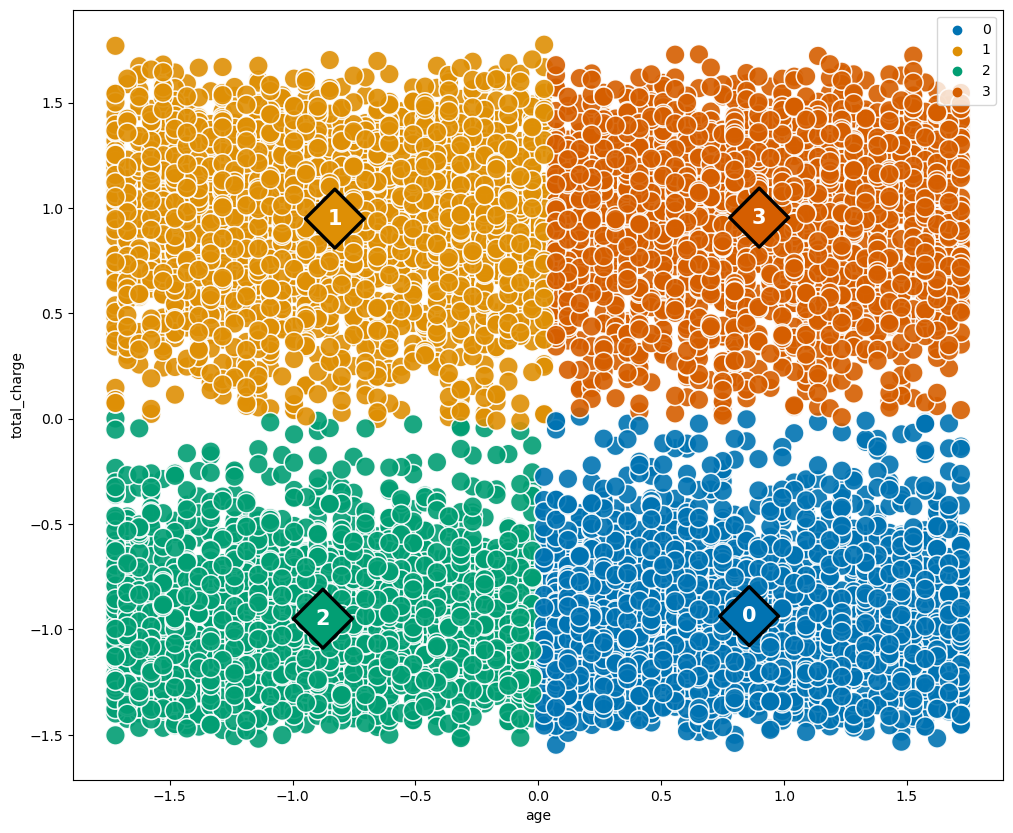

In [26]:
# Visualize the clusters along with the centroids
plt.figure(figsize = (12,10))

ax = sns.scatterplot(data=scaled_df,
                    x='age',
                    y='total_charge', 
                    hue=fin_model.labels_,
                    palette = 'colorblind',
                    alpha=0.9,
                    s=200,
                    legend=True)

ax = sns.scatterplot(data=centroid,
                    x='age',
                    y='total_charge',
                    hue=centroid.index,
                    palette='colorblind',
                    s=900,
                    marker='D',
                    ec='black',
                    legend=False)

for i in range(len(centroid)):
    plt.text(x=centroid.age[i],
            y=centroid.total_charge[i],
            s=i,
            horizontalalignment='center',
            verticalalignment='center',
            size=15,
            weight='bold',
            color='white')

In [27]:
# Add the cluster to the dataframe for further analysis
df['cluster'] = fin_model.labels_.tolist()
df.head(12)

,customer_id,interactions,uid,city,state,county,zip,lat,lng,population,...,additional_charges,survey_timely_admission,survey_timely_treatment,survey_timely_visits,survey_reliability,survey_options,survey_hours_treatment,survey_courteous_staff,survey_active_listening,cluster
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,17939.403420,3,3,2,2,4,3,3,4,2
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,17612.998120,3,4,3,4,4,4,3,3,2
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,17505.192460,2,4,4,4,3,4,3,3,2
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,12993.437350,3,5,5,3,4,5,5,5,0
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,3716.525786,2,1,3,3,5,3,4,3,2
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,...,12742.589910,4,5,4,4,3,5,4,6,0
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,...,16815.513600,4,3,3,2,3,4,5,5,2
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,...,6930.572138,1,2,2,5,4,2,4,2,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,...,8363.187290,3,3,2,3,3,3,4,2,2


## Part 5: Data Summary and Implications

1. Quality of Clusters

    The quality of the clusters can be analyzed by the silhouette score. In this case the silhouette score is above .50 which means that it is very close to being very similar. A score of 1 is the highest and means that the clusters are very similar. So .50 is a very good score. 
&nbsp;

2. Results and implications

    The K-means model with 4 clusters shows patients grouped in four ways according to age and total cost. Cluster 0 contains older patients who had a low hospitalization cost. Cluster 1 contains younger patients with high cost. Cluster 2 contains younger patients with low costs. And cluster 3 contains older patients with high hospitalization cost. On their own these clusters are just the spread of all possibilities between age and total cost. However with these clusters created we can now further explore the patients to see what similarities the patients in the clusters have for other variables. 

In [28]:
def process_demographics(df, variable):
    # Create dummy variables
    demographics = pd.get_dummies(df, columns=[variable])
    
    # Aggregation on the whole dataset
    overall_agg = demographics.agg({
        'age': 'median',
        'total_charge': 'median',
        **{f'{variable}_{category}': 'mean' for category in df[variable].unique()}
    }).round(2)
    
    # Aggregation by clusters
    cluster_agg = demographics.groupby('cluster').agg({
        'age': 'median',
        'total_charge': 'median',
        **{f'{variable}_{category}': 'mean' for category in df[variable].unique()}
    })
    
    return demographics, overall_agg, cluster_agg

def df_to_html_scrollable(df, title=""):
    return f"""
    <div style="overflow-x:auto; white-space: nowrap;">
        <h3>{title}</h3>
        {df.to_html(index=False)}
    </div>
    """

In [29]:
variables = ['gender', 'readmission', 'initial_admin']
results = {}

for variable in variables:
    demographics, overall_agg, cluster_agg = process_demographics(df, variable)
    results[variable] = {
        'demographics': demographics,
        'overall_agg': overall_agg,
        'cluster_agg': cluster_agg
    }

# Access the results for each variable
html_output = ""
for variable in variables:
    html_output += df_to_html_scrollable(results[variable]['overall_agg'].to_frame().T, f"Overall Aggregation for {variable}")
    html_output += df_to_html_scrollable(results[variable]['cluster_agg'], f"Cluster Aggregation for {variable}")

display(HTML(html_output))

By breaking down other variables by the four clusters we can see further patterns emerge that can help to improve patient outcomes and optimize hospital resources. For instance in the readmission groupings we can see that the clusters with low total charge result in no readmission. However the clusters with high charges result in nearly 75% readmission. For further analysis as to why this may be happening we can look into what services were used by those patients, or what medical conditions they have. If these patients have similarities in these other variables we can decide to focus on patients with those conditions or services used to mitigate the high readmission rate. 

3. Limitations of data analysis

    One of the limitations of the data and the clusters that I have identified is that the variance in the age and cost between groups is not huge. This is seen by the scatterplot created above which visually only shows two clusters. Even with the centroids labeled the age data points are not as seperate. So while the clusters do have significant similarities within their data points, there is also similarity between the data points as well. This makes any decision making difficult since there is not clear division amongst the groups.
&nbsp;

4. Course of action

    My recommended course of action would be to expand on the analysis to include all of the variables and drill down into all similarities between the data points in each cluster, focusing especially on the clusters of high cost which we see have higher readmission rates. This further analysis will help to identify the variables that the hospital system can track and figure out ways to reduce readmission and costs.

## Part 6: Demonstration

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9bd5c2a4-88b7-4e7d-b11e-b19e005bc6ab

## Sources

For the creation of this project I used the D212 Data Mining track on DataCamp to create the KMeans model code and normalization as well as the understanding of K Means as a technique. 

The D212 course videos were also used to formulate the structure of the project. 

> Datacamp. “D212 Data Mining II.” Datacamp, app.datacamp.com/learn/custom-tracks/custom-data-mining-ii. Accessed 28 June 2024.

> Kamara, Kesselly. “KMeans Presentation Background.” Panopto, wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3de3be7f-128b-4ed1-b2d6-b0ee01871d39. Accessed 28 June 2024.

> Kamara, Kesselly. “Constructing and Fitting KMeans on Dataset.” Panopto, wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3de3be7f-128b-4ed1-b2d6-b0ee01871d39. Accessed 28 June 2024.

> Kamara, Kesselly. “Evaluate KMeans Model.” Panopto, wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3de3be7f-128b-4ed1-b2d6-b0ee01871d39. Accessed 28 June 2024.

> Kamara, Kesselly. “Analyze and Interpret KMeans.” Panopto, wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3de3be7f-128b-4ed1-b2d6-b0ee01871d39. Accessed 28 June 2024.